In [64]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
import matplotlib.pyplot as pyplot
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint

In [65]:


(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [66]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', ),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same' ),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

In [67]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)         

In [ ]:
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)


In [ ]:

history=model.fit(X_train, y_train,
          epochs=80,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint])

Epoch 1/80
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3928 - accuracy: 0.1972 - val_loss: 1.8802 - val_accuracy: 0.2984

Epoch 00001: val_accuracy improved from -inf to 0.29840, saving model to best_model.hdf5
Epoch 2/80
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8039 - accuracy: 0.3260 - val_loss: 1.6440 - val_accuracy: 0.3977

Epoch 00002: val_accuracy improved from 0.29840 to 0.39770, saving model to best_model.hdf5
Epoch 3/80
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5707 - accuracy: 0.4243 - val_loss: 1.3821 - val_accuracy: 0.4962

Epoch 00003: val_accuracy improved from 0.39770 to 0.49620, saving model to best_model.hdf5
Epoch 4/80
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3909 - accuracy: 0.4976 - val_loss: 1.2630 - val_accuracy: 0.5431

Epoch 00004: val_accuracy improved from 0.49620 to 0.54310, saving model to best_model.hdf5
Epoch 5/80
1563/1563 [==============================] -

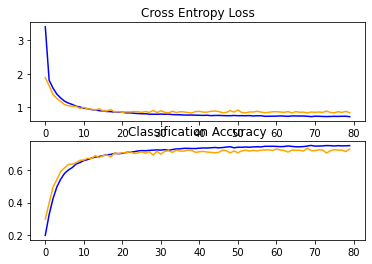

In [ ]:
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [69]:
from keras.models import load_model 
model = load_model('best_model.hdf5')

In [70]:
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 73.840


In [71]:
pred = model.predict(X_test)
print(pred)


pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[2.86216295e-04 1.81549796e-04 6.70744944e-03 ... 9.98518663e-04
  1.82674304e-02 4.16233379e-05]
 [3.99552099e-02 3.67737049e-03 6.74227078e-04 ... 4.65545527e-05
  9.48037028e-01 6.81802956e-03]
 [1.01771206e-01 2.46894453e-03 1.61272183e-03 ... 1.00191613e-03
  8.71068716e-01 1.60826389e-02]
 ...
 [5.38912318e-12 3.88450071e-11 2.23804227e-06 ... 1.52318205e-06
  7.08399311e-11 7.19228427e-11]
 [1.60841390e-01 7.54048169e-01 1.69456366e-03 ... 4.75255511e-04
  1.22112185e-02 6.90871254e-02]
 [7.38527831e-07 1.86893501e-09 1.09948545e-04 ... 9.97610569e-01
  3.04980361e-08 3.57035077e-07]]
[3 8 8 ... 5 1 7]


In [72]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               

In [80]:
y_test=y_test.reshape(-1,)

In [81]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

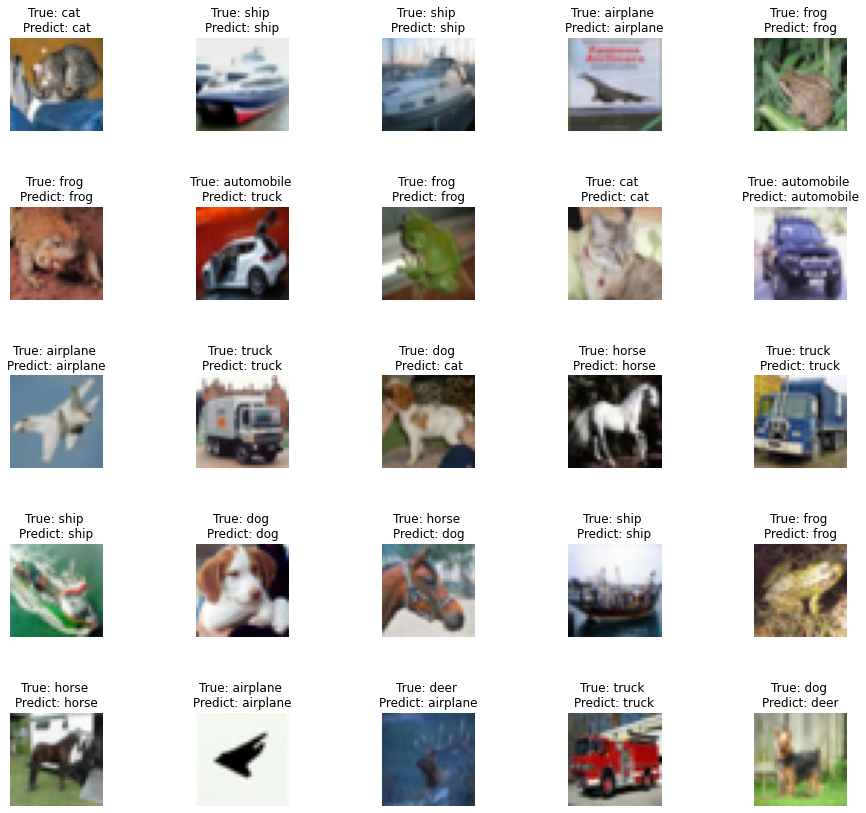

In [82]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test[i]], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)